<a href="https://colab.research.google.com/github/YoannRaguenes/Projet-Data-Science-Clubs-De-Foot-Anglais/blob/master/Graphiques_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tab = pd.read_csv('EnglishClubsStats (1).csv')
wins_home15 = tab.loc[((tab['games_home'])==15) & ((tab['league'])=='Premier League')]["wins_home"]
name15 = tab.loc[((tab['games_home'])==15) & ((tab['league'])=='Premier League')]["name"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  # Remove the CWD from sys.path while we load stuff.


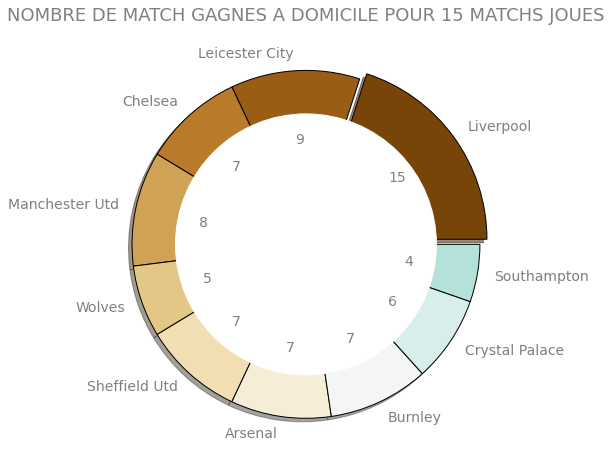

In [5]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(wins_home15)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct
plt.figure(figsize=(8,8))
explodes=(0.05,0,0,0,0,0,0,0,0,0)
plt.pie(wins_home15,labels = name15,autopct=make_autopct(wins_home15),explode=explodes, colors =sns.color_palette("BrBG",15),textprops= {"color": "grey","size":14} ,shadow=True, wedgeprops = {"linewidth":1,"edgecolor":"black"})
my_circ = plt.Circle((0,0),.75, edgecolor = "grey",color = "white")
plt.gca().add_artist(my_circ)
plt.title("NOMBRE DE MATCH GAGNES A DOMICILE POUR 15 MATCHS JOUES", color = "grey", size=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


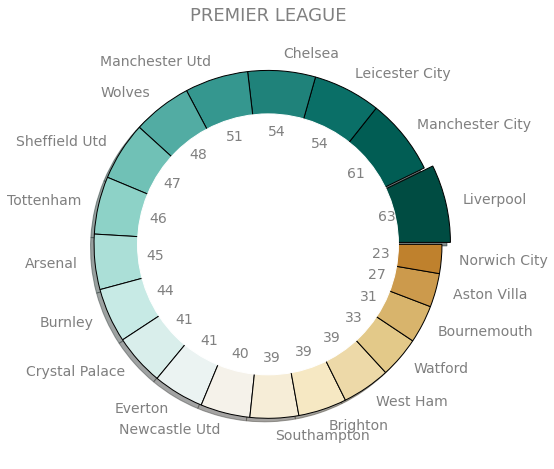

Les équipes qui peuvent être reléguées sont: Bournemouth , Aston Villa , Norwich City
Pour la league Premier League , voici les meilleurs gardiens et joueurs avec leur nombre de buts pour les équipes prêtes à être reléguées:
Bournemouth : Meilleur(s) joueur(s) et son nombre de buts: 113    Callum Wilson - 8
Name: top_team_scorers, dtype: object | Meilleur gardien 113    Aaron Ramsdale
Name: top_keeper, dtype: object
Aston Villa : Meilleur(s) joueur(s): 114    Jack Grealish - 7
Name: top_team_scorers, dtype: object | Meilleur gardien 114    Tom Heaton
Name: top_keeper, dtype: object
Norwich City : Meilleur(s) joueur(s): 115    Teemu Pukki - 11
Name: top_team_scorers, dtype: object | Meilleur gardien 115    Tim Krul
Name: top_keeper, dtype: object


In [150]:
tab = pd.read_csv('EnglishClubsStats (1).csv')
def win_rates(league):
  wr=[]
  games_home = tab.loc[((tab['league'])==league) & ((tab['name'])!='Bury')]["games_home"]
  wins_home = tab.loc[((tab['league'])==league) & ((tab['name'])!='Bury')]["wins_home"]
  games_away = tab.loc[((tab['league'])==league) & ((tab['name'])!='Bury')]["games_away"]
  wins_away = tab.loc[((tab['league'])==league) & ((tab['name'])!='Bury')]["wins_away"]
  name = tab.loc[((tab['league'])==league) & ((tab['name'])!='Bury')]["name"] 
  if(league== 'National League'):
    index=0
    index2=24
  if(league== 'League Two'):
    index=24
    index2=24
  if(league== 'League One'):
    index=48
    index2=23
  if(league== 'Championship'):
    index=72
    index2=24
  if(league== 'Premier League'):
    index=96
    index2=20              
  for i in range(index,index+index2):
    s=wins_home[i]+wins_away[i]
    s=s/(games_home[i]+games_away[i])*100
    wr.append(s)
    wr.sort()
    wr.reverse()
  return wr,name,index,index2
  
def make_autopct(values):
    def my_autopct(pct):
        total = sum(win)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

def meilleurs(league,name,index,index2):
  nom = name
  top_player1 = tab.loc[(tab['name'])== nom[index+index2-3]]["top_team_scorers"]
  top_player2 = tab.loc[(tab['name'])== nom[index+index2-2]]["top_team_scorers"]
  top_player3 = tab.loc[(tab['name'])== nom[index+index2-1]]["top_team_scorers"]
  top_keeper1 = tab.loc[(tab['name'])== nom[index+index2-3]]["top_keeper"]
  top_keeper2 = tab.loc[(tab['name'])== nom[index+index2-2]]["top_keeper"]
  top_keeper3 = tab.loc[(tab['name'])== nom[index+index2-1]]["top_keeper"]
  print("Pour la league",league,", voici les meilleurs gardiens et joueurs avec leur nombre de buts pour les équipes prêtes à être reléguées:")
  print(nom[index+index2-3],": Meilleur(s) joueur(s) et son nombre de buts:",top_player1,"| Meilleur gardien",top_keeper1)
  print(nom[index+index2-2],": Meilleur(s) joueur(s):",top_player2,"| Meilleur gardien",top_keeper2)
  print(nom[index+index2-1],": Meilleur(s) joueur(s):",top_player3,"| Meilleur gardien",top_keeper3)

def main(league):
  win,name,index,index2 = win_rates(league)
  plt.figure(figsize=(8,8))
  explodes=[0.05]
  for i in range(index2-1):
    explodes.append(0)
  plt.pie(win,labels = name,autopct=make_autopct(win),explode=explodes,pctdistance=0.65, colors =sns.color_palette("BrBG_r",24),textprops= {"color": "grey","size":14} ,shadow=True, wedgeprops = {"linewidth":1,"edgecolor":"black"})
  my_circ = plt.Circle((0,0),.75, edgecolor = "grey",color = "white")
  plt.gca().add_artist(my_circ)
  plt.title(league.upper(), color = "grey", size=18)
  plt.show()  
  print("Les équipes qui peuvent être reléguées sont:",name[index+index2-3],",",name[index+index2-2],",",name[index+index2-1])
  meilleurs(league,name,index,index2)

if __name__ == "__main__":
    main("Premier League")